In [1]:
import keras
import h5py
import numpy as np
import random
import cv2
from keras_tqdm import TQDMNotebookCallback
from tqdm import tqdm_notebook

IMG_SIZE = 256
infodir = 'C:/Science_Research/xraynet_data/images'
test_path = f'{infodir}/test.h5'
train_path = f'{infodir}/train.h5'
MODEL_NAME = 'xrayNet-keras-inception-resnet-v2' #gve the model a name
# input image dimensions

D:\anaconda\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


[1. 0.]


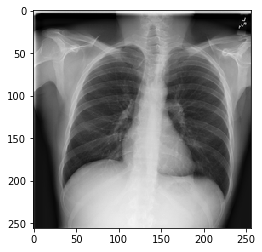

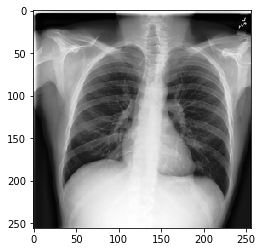

In [3]:
from matplotlib import pyplot as plt
import h5py

h5f = h5py.File(test_path, 'r')
image = h5f['X'][11]
print(h5f['Y'][11])
plt.imshow(image, cmap='gray')
plt.show()
im = image*255
im = cv2.equalizeHist(im.astype('uint8'))
plt.imshow(im.astype('float32'), cmap='gray')
plt.show()
h5f.close()

In [3]:
img_path = 'C:/Science_Research/xraynet_data/images/images/'
with open('Data_Entry_2017.csv','r') as csv:
    subjects = []
    for row in csv:
        subjects.append(row.strip().split(','))
    subjects.pop(0)
    subjects.sort(key=lambda x: x[0])

all_ill = ['Atelectasis',
 'Cardiomegaly',
 'Consolidation',
 'Edema',
 'Effusion',
 'Emphysema',
 'Fibrosis',
 'Hernia',
 'Infiltration',
 'Mass',
 'No Finding',
 'Nodule',
 'Pleural_Thickening',
 'Pneumonia',
 'Pneumothorax']

def get_list_by_diagnosis(diag='No Finding', show_multi = True):
    return [case[0] for case in subjects if (diag == case[1] if show_multi == False else diag in case[1])]

infil = get_list_by_diagnosis(diag='Infiltration', show_multi = True)
norm = get_list_by_diagnosis(diag='No Finding', show_multi = True)[:len(infil)]

In [5]:
###  1 = infil ###
X = []
y = []
import os
for name in tqdm_notebook(os.listdir(img_path)):
    if name in infil:
        X.append(np.array(cv2.resize(cv2.imread(f'{img_path}{name}',cv2.IMREAD_GRAYSCALE),(IMG_SIZE,IMG_SIZE))))
        y.append(1)
    elif name in norm:
        X.append(np.array(cv2.resize(cv2.imread(f'{img_path}{name}',cv2.IMREAD_GRAYSCALE),(IMG_SIZE,IMG_SIZE))))
        y.append(0)

In [6]:
def process_data(X,y):
    out = []
    for img in tqdm_notebook(X):
        img = cv2.equalizeHist(img.astype('uint8'))
        img = img.astype('float32')/255
        img = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)
        out.append(img)
    out = np.array(out)   
    y = np.array(y)
    ##Shuffle and return data and labels together
    perm = np.random.permutation(out.shape[0])
    return out[perm], y[perm]

X, y = process_data(X,y)

X_val = X[-1000:]
y_val = y[-1000:]

X = X[:-1000]
y = y[:-1000]

In [4]:
import os
os.chdir('C:/Science_Research/')
#np.save('X', X)
#np.save('y', y)
#np.save('X_val', X_val)
#np.save('y_val', y_val)

X_val = np.load(f'X_val.npy')
y_val = np.load(f'y_val.npy')
X_train = np.load(f'X.npy')
Y_train = np.load(f'y.npy')

In [8]:
#import h5py
#
#def load_val():
#    h5f = h5py.File(test_path, 'r')
#    X_val_pre = h5f['X']
#    Y_val_pre = h5f['Y']
#
#    X_val = []
#    Y_val = []
#
#
#
#    for image in tqdm_notebook(X_val_pre):
#        im = image*255
#        eq = cv2.equalizeHist(im.astype('uint8'))
#        im = eq.astype('float32')/255
#        X_val.append(cv2.cvtColor(im, cv2.COLOR_GRAY2RGB))
#
#    for label in tqdm_notebook(Y_val_pre):
#        Y_val.append(label[0])
#        
#    h5f.close()
#    return X_val, Y_val
#    
#def load_data_batch(start,stop):
#    h5f = h5py.File(train_path, 'r')
#    X_train_pre = h5f['X'][start:stop]
#    Y_train_pre = h5f['Y'][start:stop]
#
#    X_train = []
#    Y_train = []
#
#    for image in tqdm_notebook(X_train_pre):
#        im = image*255
#        eq = cv2.equalizeHist(im.astype('uint8'))
#        im = eq.astype('float32')/255
#        X_train.append(cv2.cvtColor(im, cv2.COLOR_GRAY2RGB))
#
#    for label in tqdm_notebook(Y_train_pre):
#        Y_train.append(label[0])
#        
#    h5f.close()        
#    return X_train, Y_train
#

In [9]:
#X_val, Y_val = load_val()

#X_train, Y_train = load_data_batch(0,10000)

In [19]:
X_train = X_train[:10000]
Y_train = Y_train[:10000]
print(X_train.shape)
print(X_val.shape)

(10000, 256, 256, 3)
(1000, 256, 256, 3)


In [10]:
# Import the InceptionResNetV2 network architecture
from keras.applications.inception_resnet_v2 import *

IMG_WIDTH = 256
IMG_HEIGHT = 256
IMG_DEPTH = 3
BATCH_SIZE = 64


# Instantiate the model with the pre-trained weights (no top)
conv_base = InceptionResNetV2(weights='imagenet',
                  include_top=False, 
                  input_shape=(IMG_HEIGHT, IMG_WIDTH, IMG_DEPTH))

# Show the architecture
conv_base.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 256, 256, 3)  0                                            
__________________________________________________________________________________________________
conv2d_204 (Conv2D)             (None, 127, 127, 32) 864         input_2[0][0]                    
__________________________________________________________________________________________________
batch_normalization_204 (BatchN (None, 127, 127, 32) 96          conv2d_204[0][0]                 
__________________________________________________________________________________________________
activation_204 (Activation)     (None, 127, 127, 32) 0           batch_normalization_204[0][0]    
__________________________________________________________________________________________________
conv2d_205

__________________________________________________________________________________________________
activation_222 (Activation)     (None, 29, 29, 32)   0           batch_normalization_222[0][0]    
__________________________________________________________________________________________________
activation_224 (Activation)     (None, 29, 29, 32)   0           batch_normalization_224[0][0]    
__________________________________________________________________________________________________
activation_227 (Activation)     (None, 29, 29, 64)   0           batch_normalization_227[0][0]    
__________________________________________________________________________________________________
block35_2_mixed (Concatenate)   (None, 29, 29, 128)  0           activation_222[0][0]             
                                                                 activation_224[0][0]             
                                                                 activation_227[0][0]             
__________

__________________________________________________________________________________________________
conv2d_247 (Conv2D)             (None, 29, 29, 32)   10240       block35_5_ac[0][0]               
__________________________________________________________________________________________________
conv2d_250 (Conv2D)             (None, 29, 29, 48)   13824       activation_249[0][0]             
__________________________________________________________________________________________________
batch_normalization_247 (BatchN (None, 29, 29, 32)   96          conv2d_247[0][0]                 
__________________________________________________________________________________________________
batch_normalization_250 (BatchN (None, 29, 29, 48)   144         conv2d_250[0][0]                 
__________________________________________________________________________________________________
activation_247 (Activation)     (None, 29, 29, 32)   0           batch_normalization_247[0][0]    
__________

batch_normalization_269 (BatchN (None, 29, 29, 64)   192         conv2d_269[0][0]                 
__________________________________________________________________________________________________
activation_264 (Activation)     (None, 29, 29, 32)   0           batch_normalization_264[0][0]    
__________________________________________________________________________________________________
activation_266 (Activation)     (None, 29, 29, 32)   0           batch_normalization_266[0][0]    
__________________________________________________________________________________________________
activation_269 (Activation)     (None, 29, 29, 64)   0           batch_normalization_269[0][0]    
__________________________________________________________________________________________________
block35_9_mixed (Concatenate)   (None, 29, 29, 128)  0           activation_264[0][0]             
                                                                 activation_266[0][0]             
          

conv2d_289 (Conv2D)             (None, 14, 14, 128)  139264      block17_2_ac[0][0]               
__________________________________________________________________________________________________
batch_normalization_289 (BatchN (None, 14, 14, 128)  384         conv2d_289[0][0]                 
__________________________________________________________________________________________________
activation_289 (Activation)     (None, 14, 14, 128)  0           batch_normalization_289[0][0]    
__________________________________________________________________________________________________
conv2d_290 (Conv2D)             (None, 14, 14, 160)  143360      activation_289[0][0]             
__________________________________________________________________________________________________
batch_normalization_290 (BatchN (None, 14, 14, 160)  480         conv2d_290[0][0]                 
__________________________________________________________________________________________________
activation

__________________________________________________________________________________________________
block17_7 (Lambda)              (None, 14, 14, 1088) 0           block17_6_ac[0][0]               
                                                                 block17_7_conv[0][0]             
__________________________________________________________________________________________________
block17_7_ac (Activation)       (None, 14, 14, 1088) 0           block17_7[0][0]                  
__________________________________________________________________________________________________
conv2d_309 (Conv2D)             (None, 14, 14, 128)  139264      block17_7_ac[0][0]               
__________________________________________________________________________________________________
batch_normalization_309 (BatchN (None, 14, 14, 128)  384         conv2d_309[0][0]                 
__________________________________________________________________________________________________
activation

activation_327 (Activation)     (None, 14, 14, 192)  0           batch_normalization_327[0][0]    
__________________________________________________________________________________________________
block17_12_mixed (Concatenate)  (None, 14, 14, 384)  0           activation_324[0][0]             
                                                                 activation_327[0][0]             
__________________________________________________________________________________________________
block17_12_conv (Conv2D)        (None, 14, 14, 1088) 418880      block17_12_mixed[0][0]           
__________________________________________________________________________________________________
block17_12 (Lambda)             (None, 14, 14, 1088) 0           block17_11_ac[0][0]              
                                                                 block17_12_conv[0][0]            
__________________________________________________________________________________________________
block17_12

batch_normalization_344 (BatchN (None, 14, 14, 192)  576         conv2d_344[0][0]                 
__________________________________________________________________________________________________
batch_normalization_347 (BatchN (None, 14, 14, 192)  576         conv2d_347[0][0]                 
__________________________________________________________________________________________________
activation_344 (Activation)     (None, 14, 14, 192)  0           batch_normalization_344[0][0]    
__________________________________________________________________________________________________
activation_347 (Activation)     (None, 14, 14, 192)  0           batch_normalization_347[0][0]    
__________________________________________________________________________________________________
block17_17_mixed (Concatenate)  (None, 14, 14, 384)  0           activation_344[0][0]             
                                                                 activation_347[0][0]             
__________

mixed_7a (Concatenate)          (None, 6, 6, 2080)   0           activation_361[0][0]             
                                                                 activation_363[0][0]             
                                                                 activation_366[0][0]             
                                                                 max_pooling2d_8[0][0]            
__________________________________________________________________________________________________
conv2d_368 (Conv2D)             (None, 6, 6, 192)    399360      mixed_7a[0][0]                   
__________________________________________________________________________________________________
batch_normalization_368 (BatchN (None, 6, 6, 192)    576         conv2d_368[0][0]                 
__________________________________________________________________________________________________
activation_368 (Activation)     (None, 6, 6, 192)    0           batch_normalization_368[0][0]    
__________

__________________________________________________________________________________________________
block8_5_mixed (Concatenate)    (None, 6, 6, 448)    0           activation_383[0][0]             
                                                                 activation_386[0][0]             
__________________________________________________________________________________________________
block8_5_conv (Conv2D)          (None, 6, 6, 2080)   933920      block8_5_mixed[0][0]             
__________________________________________________________________________________________________
block8_5 (Lambda)               (None, 6, 6, 2080)   0           block8_4_ac[0][0]                
                                                                 block8_5_conv[0][0]              
__________________________________________________________________________________________________
block8_5_ac (Activation)        (None, 6, 6, 2080)   0           block8_5[0][0]                   
__________

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.


In [11]:
# Extract features
train_features = conv_base.predict(np.array(X_train), batch_size=BATCH_SIZE, verbose=2)
val_features = conv_base.predict(np.array(X_val), batch_size=BATCH_SIZE, verbose=2)

In [20]:
# Save extracted features
np.savez("train_features", train_features, Y_train)
np.savez("val_features", val_features, y_val)

In [21]:
print(train_features.shape,"\n", val_features.shape)

(10000, 6, 6, 1536) 
 (1000, 6, 6, 1536)


In [22]:
# Flatten extracted features
train_features_flat = np.reshape(train_features, (10000, 6*6*1536))
val_features_flat = np.reshape(val_features, (1000, 6*6*1536))

In [23]:
#Y_train = np.array(Y_train)
#Y_val = np.array(Y_val)
print(Y_train.shape, '\n' ,y_val.shape)

(10000,) 
 (1000,)


In [53]:
from keras import models
from keras import layers
from keras import optimizers
from keras import callbacks
from keras import backend as K

# Define the densely connected classifier
NB_TRAIN_SAMPLES = train_features_flat.shape[0]
NB_VALIDATION_SAMPLES = val_features_flat.shape[0]
NB_EPOCHS = 50

model = models.Sequential()
model.add(layers.Dense(512, activation='relu', input_dim=(6*6*1536)))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(
    loss='binary_crossentropy',
    optimizer=optimizers.RMSprop(lr=1e-6),
    metrics=['acc'])

reduce_learning = callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.2,
    patience=2,
    verbose=1,
    mode='auto',
    epsilon=0.0001,
    cooldown=2,
    min_lr=0)

eary_stopping = callbacks.EarlyStopping(
    monitor='val_loss',
    min_delta=0,
    patience=7,
    verbose=1,
    mode='auto')

callbacks = [TQDMNotebookCallback() ,eary_stopping, reduce_learning]

In [54]:
# Train the the model
history = model.fit(
    train_features_flat,
    Y_train,
    epochs=NB_EPOCHS,
    validation_data=(val_features_flat, y_val),
    verbose = 2,
    callbacks=callbacks
)

Train on 10000 samples, validate on 1000 samples


Epoch 1/50
 - 13s - loss: 0.7159 - acc: 0.5957 - val_loss: 0.6656 - val_acc: 0.6220


Epoch 2/50
 - 10s - loss: 0.6267 - acc: 0.6686 - val_loss: 0.6387 - val_acc: 0.6470


Epoch 3/50
 - 10s - loss: 0.5853 - acc: 0.6936 - val_loss: 0.6486 - val_acc: 0.6260


Epoch 4/50
 - 10s - loss: 0.5571 - acc: 0.7111 - val_loss: 0.6301 - val_acc: 0.6610


Epoch 5/50
 - 10s - loss: 0.5379 - acc: 0.7229 - val_loss: 0.6260 - val_acc: 0.6550


Epoch 6/50
 - 10s - loss: 0.5171 - acc: 0.7411 - val_loss: 0.6258 - val_acc: 0.6530


Epoch 7/50
 - 10s - loss: 0.5001 - acc: 0.7525 - val_loss: 0.6343 - val_acc: 0.6610


Epoch 8/50
 - 10s - loss: 0.4864 - acc: 0.7661 - val_loss: 0.6377 - val_acc: 0.6520


Epoch 9/50

Epoch 00009: ReduceLROnPlateau reducing learning rate to 1.9999999949504855e-07.
 - 11s - loss: 0.4698 - acc: 0.7742 - val_loss: 0.6310 - val_acc: 0.6640


Epoch 10/50
 - 10s - loss: 0.4511 - acc: 0.7921 - val_loss: 0.6153 - val_acc: 0.6540


Epoch 11/50
 - 10s - loss: 0.4461 - acc: 0.7982 - val_loss: 0.6199 - val_acc: 0.6620


Epoch 12/50
 - 10s - loss: 0.4425 - acc: 0.7975 - val_loss: 0.6181 - val_acc: 0.6610


Epoch 13/50
 - 10s - loss: 0.4399 - acc: 0.7990 - val_loss: 0.6138 - val_acc: 0.6540


Epoch 14/50
 - 10s - loss: 0.4360 - acc: 0.7990 - val_loss: 0.6145 - val_acc: 0.6540


Epoch 15/50
 - 10s - loss: 0.4369 - acc: 0.8020 - val_loss: 0.6146 - val_acc: 0.6510


Epoch 16/50

Epoch 00016: ReduceLROnPlateau reducing learning rate to 4.00000004674439e-08.
 - 10s - loss: 0.4314 - acc: 0.8040 - val_loss: 0.6182 - val_acc: 0.6540


Epoch 17/50
 - 10s - loss: 0.4268 - acc: 0.8085 - val_loss: 0.6145 - val_acc: 0.6540


Epoch 18/50
 - 10s - loss: 0.4270 - acc: 0.8126 - val_loss: 0.6148 - val_acc: 0.6560


Epoch 19/50
 - 10s - loss: 0.4251 - acc: 0.8124 - val_loss: 0.6146 - val_acc: 0.6530


Epoch 20/50

Epoch 00020: ReduceLROnPlateau reducing learning rate to 7.999999951380233e-09.
 - 10s - loss: 0.4236 - acc: 0.8134 - val_loss: 0.6141 - val_acc: 0.6500
Epoch 00020: early stopping


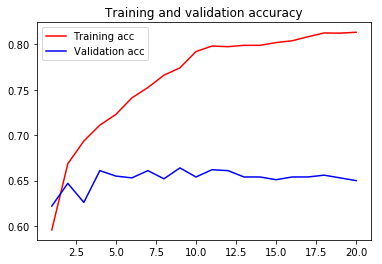

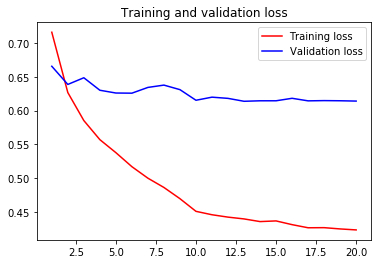

In [55]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.title('Training and validation accuracy')
plt.plot(epochs, acc, 'red', label='Training acc')
plt.plot(epochs, val_acc, 'blue', label='Validation acc')
plt.legend()

plt.figure()
plt.title('Training and validation loss')
plt.plot(epochs, loss, 'red', label='Training loss')
plt.plot(epochs, val_loss, 'blue', label='Validation loss')

plt.legend()

plt.show()

In [56]:
max(val_acc)

0.664